In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('T1199-20220524-1217.csv')
data.head()

,id,value,feed_id,created_at,lat,lon,ele
0,0F0DW4PQ6VCYVWYS9WEGQ14SYG,"{'result': {'ip':'111.223.26.1','id':'T1199','...",1781777,2022-04-23 23:49:12 UTC,NaN,NaN,NaN
1,0F0DW7KQ3J6M27T02DW79A73EQ,"{'result': {'ip':'111.223.26.1','id':'T1199','...",1781777,2022-04-23 23:54:17 UTC,NaN,NaN,NaN
2,0F0DWAGT7QRVT2QC1SKZA7MA9N,"{'result': {'ip':'111.223.26.1','id':'T1199','...",1781777,2022-04-23 23:59:22 UTC,NaN,NaN,NaN
3,0F0DWDDXZRG6NDXABCKREFQYEC,"{'result': {'ip':'111.223.26.1','id':'T1199','...",1781777,2022-04-24 00:04:27 UTC,NaN,NaN,NaN
4,0F0DWGB20BQPD3KTNET0PCZS06,"{'result': {'ip':'111.223.26.1','id':'T1199','...",1781777,2022-04-24 00:09:32 UTC,NaN,NaN,NaN


In [3]:
data.drop(columns=['lat', 'lon', 'ele'], inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5616 entries, 0 to 5615
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          5616 non-null   object
 1   value       5616 non-null   object
 2   feed_id     5616 non-null   int64 
 3   created_at  5616 non-null   object
dtypes: int64(1), object(3)
memory usage: 175.6+ KB


In [5]:
data['Temp'] = [(float)((((i.split("'Temp':"))[1]).split(","))[0]) for i in data['value']]
data['PM25'] = [(float)((((i.split("'PM25':"))[1]).split(","))[0]) for i in data['value']]
data['lux'] = [(float)((((i.split("'lux':"))[1]).split(","))[0]) for i in data['value']]
data['VOC'] = [(float)((((i.split("'VOC':"))[1]).split(","))[0]) for i in data['value']]
data['CO'] = [(float)((((i.split("'CO':"))[1]).split(","))[0]) for i in data['value']]
data['CO2'] = [(float)((((i.split("'CO2':"))[1]).split(","))[0]) for i in data['value']]
data['O3'] = [(float)((((i.split("'O3':"))[1]).split(","))[0]) for i in data['value']]
data['RH'] = [(float)((((i.split("'RH':"))[1]).split(","))[0]) for i in data['value']]
data['Pres'] = [(float)((((i.split("'Pres':"))[1]).split("}"))[0]) for i in data['value']]

In [6]:
data['year'] = [(int)(i.split('-')[0]) for i in data['created_at']]
data['month'] = [(int)(i.split('-')[1]) for i in data['created_at']]
data['date'] = [(int)((i.split('-')[2]).split(' ')[0]) for i in data['created_at']]

In [7]:
data.drop(columns=['value', 'feed_id', 'created_at'], inplace=True)

In [8]:
data.head()

,id,Temp,PM25,lux,VOC,CO,CO2,O3,RH,Pres,year,month,date
0,0F0DW4PQ6VCYVWYS9WEGQ14SYG,36.27,195.0,2.0,0.0,0.66,514.0,204.0,25.12,993.0,2022,4,23
1,0F0DW7KQ3J6M27T02DW79A73EQ,36.27,199.0,9.0,0.0,0.69,496.0,210.0,25.15,987.0,2022,4,23
2,0F0DWAGT7QRVT2QC1SKZA7MA9N,36.27,200.0,2.0,0.0,0.62,490.0,208.0,25.15,1003.0,2022,4,23
3,0F0DWDDXZRG6NDXABCKREFQYEC,36.27,199.0,7.0,0.0,0.57,502.0,207.0,25.22,991.0,2022,4,24
4,0F0DWGB20BQPD3KTNET0PCZS06,36.25,198.0,1.0,0.0,0.70,519.0,206.0,25.41,983.0,2022,4,24


In [9]:
# current week
# MANUAL

data_curr_week = data[data['month']==5]
data_curr_week = data_curr_week[data_curr_week['date']>=18]
data_curr_week = data_curr_week[data_curr_week['date']<=24]

## Analysis

In [10]:
data_curr_week.describe()

,Temp,PM25,lux,VOC,CO,CO2,O3,RH,Pres,year,month,date
count,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.0,789.0,789.000000
mean,37.492484,168.704689,4.602028,2116.557668,0.783156,751.538657,172.599493,35.667060,991.640051,2022.0,5.0,21.631179
std,1.475620,7.414332,2.956760,9058.690054,0.363302,835.892127,8.475812,5.629144,7.262463,0.0,0.0,1.170531
min,29.620000,127.000000,0.000000,0.000000,0.170000,400.000000,129.000000,27.000000,980.000000,2022.0,5.0,20.000000
25%,37.760000,165.000000,2.000000,0.000000,0.590000,400.000000,168.000000,30.880000,985.000000,2022.0,5.0,21.000000
50%,38.070000,168.000000,5.000000,0.000000,0.720000,500.000000,172.000000,35.510000,991.000000,2022.0,5.0,21.000000
75%,38.270000,171.000000,7.000000,203.000000,0.890000,777.000000,175.000000,38.410000,998.000000,2022.0,5.0,22.000000
max,38.590000,227.000000,9.000000,60000.000000,2.730000,7016.000000,256.000000,53.330000,1004.000000,2022.0,5.0,24.000000


In [11]:
# table

table = data_curr_week.describe().loc[['mean','min','max']].T
table.rename(columns={'mean':'Current Week Average', 'max':'Current Week Highest', 'min':'Current Week Lowest'}, inplace=True)
table = table.loc[['Temp', 'Pres', 'CO', 'CO2', 'VOC', 'lux', 'RH', 'PM25', 'O3']]
table

,Current Week Average,Current Week Lowest,Current Week Highest
Temp,37.492484,29.62,38.59
Pres,991.640051,980.00,1004.00
CO,0.783156,0.17,2.73
CO2,751.538657,400.00,7016.00
VOC,2116.557668,0.00,60000.00
lux,4.602028,0.00,9.00
RH,35.667060,27.00,53.33
PM25,168.704689,127.00,227.00
O3,172.599493,129.00,256.00


### charts

In [12]:
import matplotlib.pyplot as plt

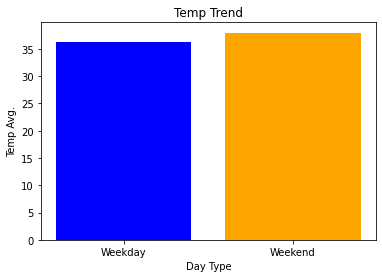

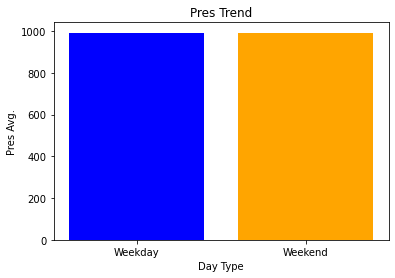

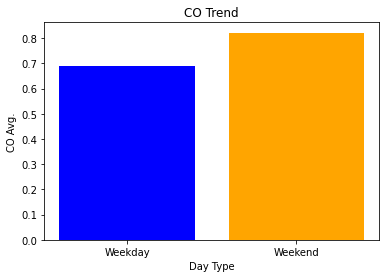

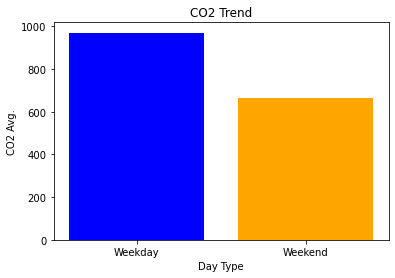

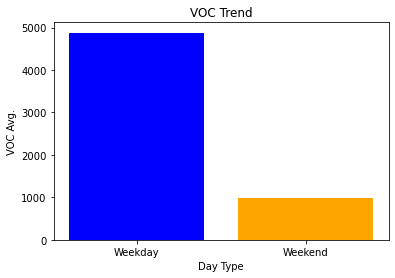

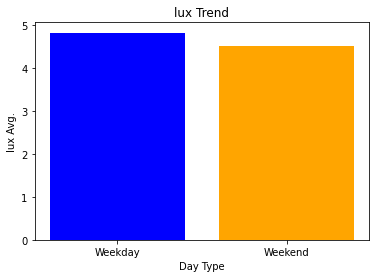

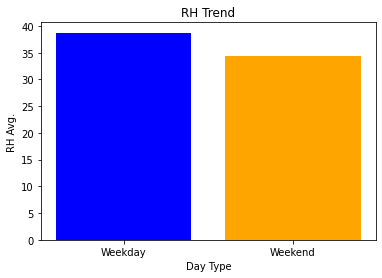

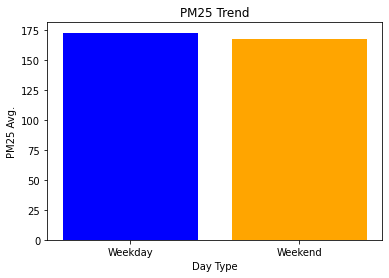

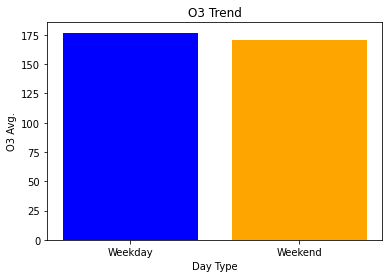

In [13]:
list_of_items = ['Temp', 'Pres', 'CO', 'CO2', 'VOC', 'lux', 'RH', 'PM25', 'O3']
colours = ['blue', 'orange']

# MANUAL
weekend_data = data_curr_week[(data_curr_week['date'] == 21) | (data_curr_week['date'] == 22)]
weekday_data = pd.concat([data_curr_week, weekend_data]).drop_duplicates(subset=['id'], keep=False)

for it in list_of_items :
    curr_item_list = [weekday_data[it].mean(), weekend_data[it].mean()]
    plt.bar(['Weekday', 'Weekend'], curr_item_list, color=colours)
    plt.xlabel('Day Type')
    plt.ylabel(it+' Avg.')
    plt.title(it+' Trend')
    plt.show()

## 0nly 5 days data in week

In [14]:
data_curr_week['date'].value_counts()

21    281
22    280
20    116
24    110
23      2
Name: date, dtype: int64